Gets 3v3 overtime data by team and game.

In [1]:
import PbPMethods2 as pm2
import GetPbP

In [2]:
team_game_cf = {}
team_game_ca = {}
team_game = {}
for season in range(2015, 2017):
    for team in pm2.get_teams(season):
        if team not in team_game:
            team_game_cf[team] = []
            team_game_ca[team] = []
            team_game[team] = []
        cur_game = 0
        for line in pm2.read_team_pbp(team, season, strengths=['3v3'], 
                                      types=['GOAL', 'SHOT', 'MISS', 'BLOCK']):
            if pm2.get_event_period(line) == 4:
                g = pm2.get_game(line)
                if not g == cur_game:
                    cur_game = g
                    team_game[team].append('{0:d}0{1:d}'.format(season, g))
                    team_game_cf[team].append(0)
                    team_game_ca[team].append(0)
                if pm2.get_acting_team(line) == team:
                    team_game_cf[team][-1] += 1
                else:
                    team_game_ca[team][-1] += 1
    print('Done with', season)

Done with 2015
Done with 2016


In [3]:
w = open('./3v3 cf data.csv', 'w')
w.write('Team,Game,CF,CA')
for team in team_game:
    for i in range(len(team_game[team])):
        w.write('\n{0:s},{1:s},{2:d},{3:d}'.format(team, team_game[team][i], 
                                                 team_game_cf[team][i],
                                                 team_game_ca[team][i]))
w.close()

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./3v3 cf data.csv')
df.head()

,Team,Game,CF,CA
0,COL,2015020091,1,1
1,COL,2015020406,4,3
2,COL,2015020532,5,5
3,COL,2015020560,2,4
4,COL,2015020598,4,6


In [6]:
df[df.Team == 'WSH']

,Team,Game,CF,CA
413,WSH,2015020160,2,2
414,WSH,2015020203,6,5
415,WSH,2015020243,3,2
416,WSH,2015020276,2,0
417,WSH,2015020388,8,2
418,WSH,2015020409,1,1
419,WSH,2015020576,3,1
420,WSH,2015020614,1,2
421,WSH,2015020741,0,2
422,WSH,2015020775,0,1


In [7]:
df.tail()

,Team,Game,CF,CA
803,WPG,2016020210,1,4
804,WPG,2016020223,1,2
805,WPG,2016020366,1,0
806,WPG,2016020388,3,8
807,WPG,2016020451,4,2


Gets 3v3 overtime data by team and second of overtime

In [8]:
team_sec_cf = {}
team_sec_ca = {}
for season in range(2015, 2017):
    for team in pm2.get_teams(season):
        if team not in team_sec_cf:
            team_sec_cf[team] = [0 for i in range(301)] #5 minutes
            team_sec_ca[team] = [0 for i in range(301)] #5 minutes
        for line in pm2.read_team_pbp(team, season, strengths=['3v3'], 
                                      types=['GOAL', 'SHOT', 'MISS', 'BLOCK']):
            if pm2.get_event_period(line) == 4:
                time = pm2.convert_time(pm2.get_event_time(line), 4) - 3600
                if pm2.get_acting_team(line) == team:
                    team_sec_cf[team][time] += 1
                else:
                    team_sec_ca[team][time] += 1
    print('Done with', season)

Done with 2015
Done with 2016


In [9]:
w = open('./3v3 cf data by sec.csv', 'w')
w.write('Team,Sec,CF,CA,CumCF,CumCA,CumCF%')
for team in team_sec_cf:
    cfsum = 0
    casum = 0
    for i, (cf, ca) in enumerate(zip(team_sec_cf[team], team_sec_ca[team])):
        cfsum += cf
        casum += ca
        if cfsum + casum == 0:
            cfpct = 0
        else:
            cfpct = cfsum*100/(cfsum+casum)
        w.write('\n{0:s},{1:d},{2:d},{3:d},{4:d},{5:d},{6:.1f}'.format(team, i, cf, ca,
                                                                    cfsum, casum, cfpct))
w.close()

In [10]:
df = pd.read_csv('./3v3 cf data by sec.csv')
df[df.Sec == 300].head()

,Team,Sec,CF,CA,CumCF,CumCA,CumCF%
300,COL,300,0,0,36,44,45.0
601,TOR,300,1,0,126,99,56.0
902,L.A,300,0,0,97,72,57.4
1203,PHI,300,0,1,133,123,52.0
1504,NSH,300,1,1,57,86,39.9


In [11]:
df[df.Team == 'WSH'].head()

,Team,Sec,CF,CA,CumCF,CumCA,CumCF%
4515,WSH,0,0,0,0,0,0
4516,WSH,1,0,0,0,0,0
4517,WSH,2,0,0,0,0,0
4518,WSH,3,0,0,0,0,0
4519,WSH,4,0,0,0,0,0


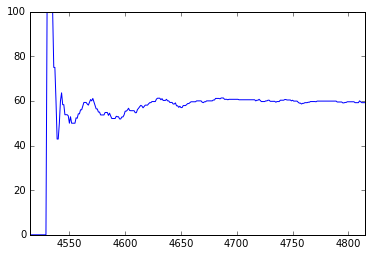

In [12]:
from pylab import *
%matplotlib inline
df[df.Team == 'WSH']['CumCF%'].plot()